In [1]:
import sys
sys.path.append("/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/_scripts")


from case_edits.recipes.two_zone import ezcase as ez
from geometry.surface_geom import SurfaceGeometryExtractor

Added 5 walls 
Added 4 walls 
skipping Block 01 Storey 0 Wall 0002_1 Door


In [2]:
case = ez.case

In [3]:
zone_walls = case.geometry.zones.B_01.walls
for wall in zone_walls.values():
    sg = SurfaceGeometryExtractor(wall)
    print(sg)

Block 01 - East - W01 
 {'1': Coordinate(X=50.0, Y=0.0, Z=10.0),
 '2': Coordinate(X=50.0, Y=0.0, Z=0.0),
 '3': Coordinate(X=50.0, Y=70.0, Z=0.0),
 '4': Coordinate(X=50.0, Y=70.0, Z=10.0)}
Block 01 - West - W03 
 {'1': Coordinate(X=0.0, Y=70.0, Z=10.0),
 '2': Coordinate(X=0.0, Y=70.0, Z=0.0),
 '3': Coordinate(X=0.0, Y=0.0, Z=0.0),
 '4': Coordinate(X=0.0, Y=0.0, Z=10.0)}
Block 01 - South - W04 
 {'1': Coordinate(X=0.0, Y=0.0, Z=10.0),
 '2': Coordinate(X=0.0, Y=0.0, Z=0.0),
 '3': Coordinate(X=50.0, Y=0.0, Z=0.0),
 '4': Coordinate(X=50.0, Y=0.0, Z=10.0)}
Block 01 - North - W02_1 
 {'1': Coordinate(X=50.0, Y=70.0, Z=10.0),
 '2': Coordinate(X=50.0, Y=70.0, Z=0.0),
 '3': Coordinate(X=0.0, Y=70.0, Z=0.0),
 '4': Coordinate(X=0.0, Y=70.0, Z=10.0)}


In [4]:
zone_walls = case.geometry.zones.B_01.walls
for wall in zone_walls.values():
    sg = SurfaceGeometryExtractor(wall)
    print(wall.display_name)
    for num, coord in sg.surface_geom.items():
        if coord.Z == 0:
            print((num, coord))

Block 01 - East - W01
('2', Coordinate(X=50.0, Y=0.0, Z=0.0))
('3', Coordinate(X=50.0, Y=70.0, Z=0.0))
Block 01 - West - W03
('2', Coordinate(X=0.0, Y=70.0, Z=0.0))
('3', Coordinate(X=0.0, Y=0.0, Z=0.0))
Block 01 - South - W04
('2', Coordinate(X=0.0, Y=0.0, Z=0.0))
('3', Coordinate(X=50.0, Y=0.0, Z=0.0))
Block 01 - North - W02_1
('2', Coordinate(X=50.0, Y=70.0, Z=0.0))
('3', Coordinate(X=0.0, Y=70.0, Z=0.0))


In [13]:
wall_obj = case.geometry.zones.B_01.walls.B_01_West_W03.data
wall_obj


BUILDINGSURFACE:DETAILED,
    Block 01 Storey 0 Wall 0003,    !- Name
    wall,                     !- Surface Type
    Project Wall,             !- Construction Name
    Block 01 Storey 0,        !- Zone Name
    ,                         !- Space Name
    outdoors,                 !- Outside Boundary Condition
    ,                         !- Outside Boundary Condition Object
    SunExposed,               !- Sun Exposure
    WindExposed,              !- Wind Exposure
    autocalculate,            !- View Factor to Ground
    autocalculate,            !- Number of Vertices
    0,                        !- Vertex 1 Xcoordinate
    70,                       !- Vertex 1 Ycoordinate
    10,                       !- Vertex 1 Zcoordinate
    0,                        !- Vertex 2 Xcoordinate
    70,                       !- Vertex 2 Ycoordinate
    0,                        !- Vertex 2 Zcoordinate
    0,                        !- Vertex 3 Xcoordinate
    0,                        !- Vertex 

In [20]:
str(8)

'8'

In [21]:
for fieldname in wall_obj.fieldnames:
    if "coordinate" in fieldname:
        if wall_obj[fieldname] != str():
            print(fieldname, wall_obj[fieldname])
        else:
            print(fieldname, type(wall_obj[fieldname]))
            assert wall_obj[fieldname] == str()

Vertex_1_Xcoordinate 0.0
Vertex_1_Ycoordinate 70.0
Vertex_1_Zcoordinate 10.0
Vertex_2_Xcoordinate 0.0
Vertex_2_Ycoordinate 70.0
Vertex_2_Zcoordinate 0.0
Vertex_3_Xcoordinate 0.0
Vertex_3_Ycoordinate 0.0
Vertex_3_Zcoordinate 0.0
Vertex_4_Xcoordinate 0.0
Vertex_4_Ycoordinate 0.0
Vertex_4_Zcoordinate 10.0
Vertex_5_Xcoordinate <class 'str'>
Vertex_5_Ycoordinate <class 'str'>
Vertex_5_Zcoordinate <class 'str'>
Vertex_6_Xcoordinate <class 'str'>
Vertex_6_Ycoordinate <class 'str'>
Vertex_6_Zcoordinate <class 'str'>
Vertex_7_Xcoordinate <class 'str'>
Vertex_7_Ycoordinate <class 'str'>
Vertex_7_Zcoordinate <class 'str'>
Vertex_8_Xcoordinate <class 'str'>
Vertex_8_Ycoordinate <class 'str'>
Vertex_8_Zcoordinate <class 'str'>
Vertex_9_Xcoordinate <class 'str'>
Vertex_9_Ycoordinate <class 'str'>
Vertex_9_Zcoordinate <class 'str'>
Vertex_10_Xcoordinate <class 'str'>
Vertex_10_Ycoordinate <class 'str'>
Vertex_10_Zcoordinate <class 'str'>
Vertex_11_Xcoordinate <class 'str'>
Vertex_11_Ycoordinate <clas

In [12]:
h = {"a": 0}
h["a"]

0

In [6]:
wall = case.geometry.zones.B_00.walls.B_00_East_W01
sg = SurfaceGeometryExtractor(wall)

In [7]:
from shapely import LineString

In [8]:
# getting the line that defines the base of this wall..
vertices = []
for coord in sg.surface_geom.values():
    if coord.Z == 0:
        vertices.append([coord.X, coord.Y])

vertices

[[100.0, 70.0], [100.0, 100.0]]

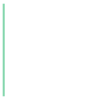

In [9]:
LineString(vertices)

In [4]:
for wall in zone_walls.values():
    geom = SurfaceGeometryExtractor(wall)
    


BUILDINGSURFACE:DETAILED,
    Block 00 Storey 0 Wall 0001,    !- Name
    wall,                     !- Surface Type
    Project Wall,             !- Construction Name
    Block 00 Storey 0,        !- Zone Name
    ,                         !- Space Name
    outdoors,                 !- Outside Boundary Condition
    ,                         !- Outside Boundary Condition Object
    SunExposed,               !- Sun Exposure
    WindExposed,              !- Wind Exposure
    autocalculate,            !- View Factor to Ground
    autocalculate,            !- Number of Vertices
    100,                      !- Vertex 1 Xcoordinate
    70,                       !- Vertex 1 Ycoordinate
    10,                       !- Vertex 1 Zcoordinate
    100,                      !- Vertex 2 Xcoordinate
    70,                       !- Vertex 2 Ycoordinate
    0,                        !- Vertex 2 Zcoordinate
    100,                      !- Vertex 3 Xcoordinate
    100,                      !- Vertex 

In [5]:
sge = SurfaceGeometryExtractor(wall)

In [6]:
sge

Block 00 - East - W01 
 {'1': Coordinate(X=100.0, Y=70.0, Z=10.0),
 '2': Coordinate(X=100.0, Y=70.0, Z=0.0),
 '3': Coordinate(X=100.0, Y=100.0, Z=0.0),
 '4': Coordinate(X=100.0, Y=100.0, Z=10.0)}